<a href="https://colab.research.google.com/github/AndrBoch/University/blob/main/tasks/Module_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №2. Работа с векторными данными в GeoPandas**

In [1]:
%%capture
!pip install geopandas leafmap mapclassify # Устанавливаем библиотеку GeoPandas и необходимые зависимости

## **Задание №1. Операции с массивами NumPy и геопространственными координатами**


1. Создайте двумерный массив NumPy, содержащий широту и долготу следующих городов: Токио (35.6895, 139.6917), Нью-Йорк (40.7128, -74.0060), Лондон (51.5074, -0.1278) и Париж (48.8566, 2.3522).


In [2]:
import numpy as np

cities = np.array([
    [35.6895, 139.6917],  # Токио
    [40.7128, -74.0060],  # Нью-Йорк
    [51.5074, -0.1278],   # Лондон
    [48.8566, 2.3522]     # Париж
])
print("Массив координат:\n", cities)

Массив координат:
 [[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]


2. Преобразуйте значения широты и долготы из градусов в радианы с помощью функции np.radians().


In [3]:
cities_rad = np.radians(cities)
print("\nКоординаты в радианах:\n", cities_rad)


Координаты в радианах:
 [[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]




3. Рассчитайте поэлементную разницу между координатами Токио и других городов в радианах.

In [4]:
tokyo_rad = cities_rad[0]  # Токио
diff_rad = tokyo_rad - cities_rad[1:]
print("\nРазница между Токио и другими городами в радианах:\n", diff_rad)


Разница между Токио и другими городами в радианах:
 [[-0.08767312  3.72972847]
 [-0.27607444  2.44031063]
 [-0.22980925  2.39702647]]


## **Задание 2. Операции с DataFrame Pandas и геопространственными данными**


1. Загрузите набор данных о городах мира по следующему URL с помощью Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [5]:
import pandas as pd

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
cities_df = pd.read_csv(url)

2. Отобразите первые 5 строк и проверьте наличие отсутствующих значений.


In [6]:
print(cities_df.head())

   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


3. Отфильтруйте набор данных, чтобы включить только города с населением более 1 миллиона человек.


In [7]:
big_cities = cities_df[cities_df['population'] > 1_000_000]
print("\nГорода с населением > 1 млн:\n", big_cities.head())


Города с населением > 1 млн:
       id            name country  latitude  longitude  population
97    98           Turin     ITA  45.07039    7.66996     1652000
103  104           Lille     FRA  50.64997    3.08001     1044000
123  124  San Bernardino     USA  34.12038 -117.30003     1745000
124  125      Bridgeport     USA  41.17998  -73.19996     1018000
126  127      Manchester     GBR  53.50042   -2.24799     2230000


4. Сгруппируйте города по странам и рассчитайте общую численность населения для каждой страны.


In [8]:
pop_by_country = big_cities.groupby('country')['population'].sum().sort_values(ascending=False)
print("\nСуммарное население по странам:\n", pop_by_country)


Суммарное население по странам:
 country
CHN    203615000
USA    134565743
IND    134458000
BRA     71900406
JPN     61636000
         ...    
DNK      1085000
JOR      1060000
IRL      1059000
LBR      1041000
GTM      1024000
Name: population, Length: 110, dtype: int64




5. Отсортируйте города по населению в порядке убывания и отобразите первые 10 городов.

In [18]:
top10_cities = big_cities.sort_values('population', ascending=False).head(10)
print("\n10 крупнейших городов:\n", top10_cities[['name', 'country', 'population']])


10 крупнейших городов:
               name country  population
1239         Tokyo     JPN    35676000
1224      New York     USA    19040000
1230   Mexico City     MEX    19028000
1240        Mumbai     IND    18978000
1245     Sao Paulo     BRA    18845000
1148         Delhi     IND    15926000
1238      Shanghai     CHN    14987000
1243       Kolkata     IND    14787000
1175         Dhaka     BGD    12797394
1217  Buenos Aires     ARG    12795000


## **Задание №3. Создание и обработка GeoDataFrames с помощью GeoPandas**


1. Загрузите набор данных о зданиях Нью-Йорка из файла GeoJSON с помощью GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import leafmap.foliumap as leafmap

nyc_buildings = gpd.read_file("https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson")

2. Создайте график контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


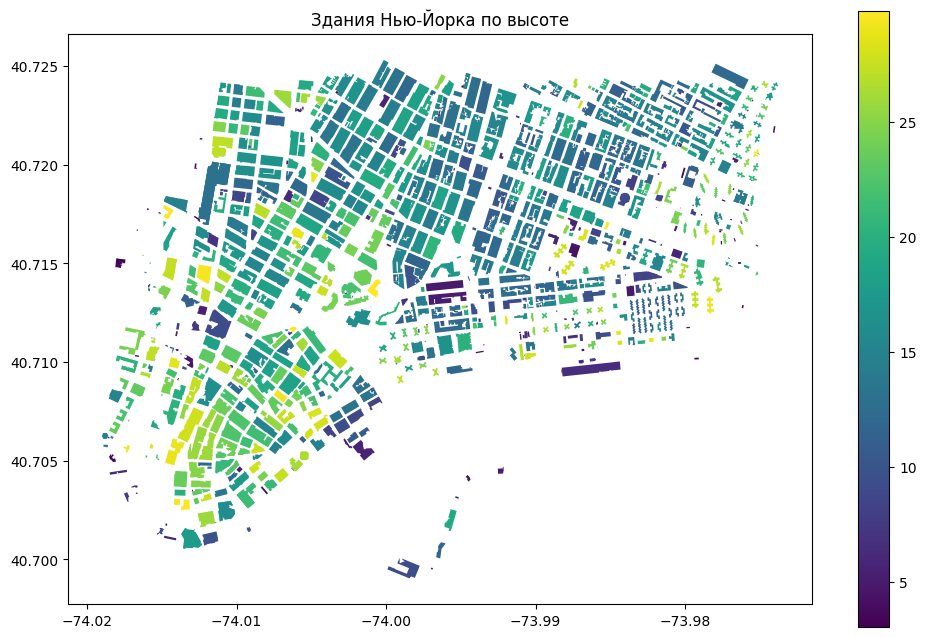

In [20]:
nyc_buildings.plot(column='height_MS', cmap='viridis', legend=True, figsize=(12,8))
plt.title("Здания Нью-Йорка по высоте")
plt.show()

3. Создайте интерактивную карту контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


In [25]:
import folium
import branca.colormap as cm


nyc_buildings['height_MS'] = nyc_buildings['height_MS'].fillna(0)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

min_height = nyc_buildings['height_MS'].min()
max_height = nyc_buildings['height_MS'].max()
colormap = cm.LinearColormap(['#440154', '#21908d', '#fde725'], vmin=min_height, vmax=max_height)

def style_function(feature):
    height = feature['properties']['height_MS']
    return {
        'fillColor': colormap(height),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.8
    }

folium.GeoJson(
    nyc_buildings,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['height_MS'], aliases=['Height (m)'])
).add_to(m)

colormap.caption = 'Высота зданий (м)'
colormap.add_to(m)

m

4. Рассчитайте среднюю высоту зданий (используйте столбец `height_MS`).


In [15]:
avg_height = nyc_buildings['height_MS'].mean()
print("Средняя высота зданий:", avg_height, "м.")

Средняя высота зданий: 15.454691136974038 м.


5. Выберите здания с высотой, превышающей среднюю высоту.


In [16]:
tall_buildings = nyc_buildings[nyc_buildings['height_MS'] > avg_height]
print("Количество зданий выше средней высоты:", len(tall_buildings))

Количество зданий выше средней высоты: 524





6. Сохраните GeoDataFrame в новый файл GeoJSON.

In [17]:
tall_buildings.to_file("tall_nyc_buildings.geojson", driver='GeoJSON')

## **Задание №4. Применение NumPy, Pandas и GeoPandas для обработки и анализа пространственных данных**


1. Используйте Pandas для загрузки набора данных о городах мира по следующему URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [39]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import leafmap.foliumap as leafmap
import folium
import branca.colormap as cm

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
cities_df = pd.read_csv(url)

2. Отфильтруйте набор данных, чтобы включить только города с широтой между -40 и 60 (т.е. города, расположенные в Северном полушарии или вблизи экватора).


In [28]:
cities_filtered = cities_df[(cities_df['latitude'] >= -40) & (cities_df['latitude'] <= 60)].copy()

3. Создайте GeoDataFrame из отфильтрованного набора данных, преобразовав широту и долготу в геометрии.


In [29]:
gdf = gpd.GeoDataFrame(
    cities_filtered,
    geometry=gpd.points_from_xy(cities_filtered['longitude'], cities_filtered['latitude']),
    crs="EPSG:4326"
)

4. Перепроецируйте GeoDataFrame в проекцию Меркатора (EPSG:3857).


In [30]:
gdf_mercator = gdf.to_crs(epsg=3857)

5. Рассчитайте расстояние (в метрах) между каждым городом и Парижем.


In [34]:
paris_point = gdf_mercator[gdf_mercator['name'] == 'Paris'].geometry.iloc[0]
gdf_mercator['dist_to_paris_m'] = gdf_mercator.geometry.distance(paris_point)
gdf_mercator[['name', 'dist_to_paris_m']].head()

,name,dist_to_paris_m
0,Bombo,7.041672e+06
1,Fort Portal,6.916454e+06
2,Potenza,1.979335e+06
3,Campobasso,1.794231e+06
4,Aosta,7.561058e+05




6. Отобразите города на карте мира, раскрасив точки в зависимости от их расстояния до Парижа.

In [43]:
gdf_wgs = gdf.copy()
gdf_wgs['dist_to_paris_m'] = gdf_mercator['dist_to_paris_m']

min_dist = gdf_wgs['dist_to_paris_m'].min()
max_dist = gdf_wgs['dist_to_paris_m'].max()
colormap = cm.LinearColormap(['#440154', '#21908d', '#fde725'], vmin=min_dist, vmax=max_dist)

m = folium.Map(location=[20, 0], zoom_start=2)

for _, row in gdf_wgs.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        fill=True,
        fill_color=colormap(row['dist_to_paris_m']),
        color='black',
        weight=0.3,
        fill_opacity=0.8,
        tooltip=f"{row['name']}, {row['country']}: {row['dist_to_paris_m']:.0f} m"
    ).add_to(m)

colormap.caption = 'Расстояние до Парижа (м)'
colormap.add_to(m)

m